## Udacity Project Data Science 

## In this notebook we use Stackoverflow’s 2017 Annual Developer Survey to answer some buisness question related to the techfield.


## Buisness Question

### 1. Does an individual need a higher degree to earn high in the tech industry  
### 2. What are the other forms of education fulltime and parttime workers in the tech industry take aswell apart from formal education 
### 3. What are some of the self-taught types individuals in the tech fields use for thier day to day questions and problems

---

In [19]:
## Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Wrangling 
This stage involves 2 major steps into the preparing the data for anysis which are data aquring and data cleaning. the process of data is aquiring will be gone once will the data cleaning will involve iterative processes for each of the buisness question we have to to answer. 

In [20]:
## Aquiring data 

df = pd.read_csv('./survey-results-public.csv')
df_schema = pd.read_csv('./survey-results-schema.csv')

## 1. Does an individual need a higher degree to earn high in tech companies 

To do our findings on this we make use of the FormalEducation and Salary columns of the data frame to extract clean and make a visualization

In [21]:
## Data Cleaning 
## Drop all nan's from the FormalEducation Coulumn
edu_df = df.dropna(subset=['FormalEducation'])
# edu_df = pd.DataFrame(edu_df.query("EmploymentStatus != 'Employed full-time' or EmploymentStatus != 'Employed part-time'"))

In [22]:
## Group Salaries by FormalEducation
new_df = edu_df.groupby(['FormalEducation'])['Salary'].mean().sort_values(ascending=True)

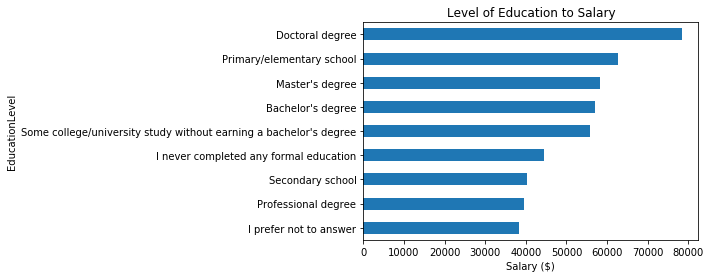

In [23]:
## Visualization and analysis, plot a bar chart for visualization
ax = new_df.plot.barh(title="Level of Education to Salary")
ax.set_xlabel("Salary ($)")
ax.set_ylabel("EducationLevel");

### Results and Observation: The visualization doesn't show a mojor difference between inviduals with higher education and lower with the exception of those with Doctoral Degree

### 2. What are the other forms of education fulltime and parttime workers in the tech industry take aswell apart from formal education 


We extract from the data set all the employees who either work falltime or parttime to determine thier highest level of education, we then use a visualization to demonstrate

In [24]:
## Data Cleaning
## Extract full and part-time workers and make a dataframe with one column 'EducationTypes' 
workders_dp = pd.DataFrame(df.query("EmploymentStatus != 'Employed full-time' or EmploymentStatus != 'Employed part-time'"))['EducationTypes'].dropna()

In [27]:
# EducationTypes is a string reperated with ';', split the string at the delimeter ';' to make a list abd trim wite spaces 
exp_df = pd.DataFrame(workders_dp.str.split(';').apply(lambda ed_list: [el.strip() for el in ed_list]))
# exp_df.head()

In [28]:
## Explode the list and determine the value count for all the possible resonses 
new_df = exp_df.explode('EducationTypes')['EducationTypes'].value_counts().sort_values()

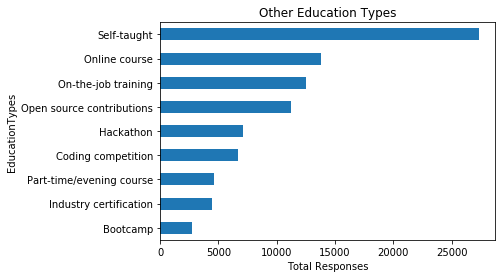

In [29]:
## Visualization and analysis, plot a bar chart for visualization
ax = new_df.plot.barh(title="Other Education Types")
ax.set_xlabel("Total Responses")
ax.set_ylabel("EducationTypes");

### Results and Observation: The visualization shows a majority of full time and part-time employers take options of being self-taught and online courses as other education types and bootcamps being the least.

### 3. What are some of the self taught types individuals in the tech fields use for thier day to day questions and problems

Self thought types here range of additional resources indivuduals in the techfield to solve some thier day to day questions and do findings

In [107]:
## Data Cleaning
## Drop all nan fields from the 'SelfThoughTypes' column
selfth_df = df.dropna(subset=['SelfTaughtTypes'], how='any')[['SelfTaughtTypes']]

In [108]:
## Split the strings in the SelfThoughTypes' column which returns a list, the for all string in list strip the white spaces from the string
selfth_df['SelfTaughtTypes'] = selfth_df['SelfTaughtTypes'].apply(lambda str:  [el.strip() for el in str.split(';')] )

In [109]:
## Explode the list and determine the value count for all the possible resonses 
new_df = selfth_df.explode('SelfTaughtTypes')['SelfTaughtTypes'].value_counts().sort_values()

In [110]:
new_df.head()

Tutoring/mentoring            1164
Other                         3129
Company internal community    4947
Friends network               5537
Textbook                      5558
Name: SelfTaughtTypes, dtype: int64

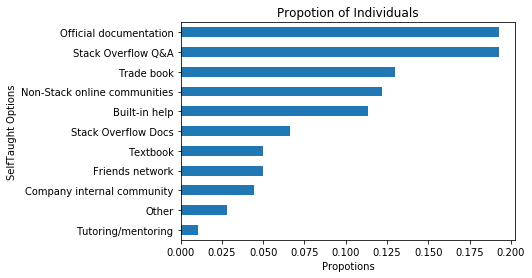

In [37]:
## Visualization and analysis, plot a bar chart for visualization
ax = (new_df/new_df.sum()).plot.barh(title="Propotion of Individuals")
ax.set_xlabel("Propotions")
ax.set_ylabel("Self-Taught Options");

In [ ]:
### Results and Observation: The visualization shows a majority of people go for the Official documentation and stack overflow for selfthought options

## Results and Observation:

### Question 1: Does an individual need a higher degree to earn high in tech companies.
### Results: Not Neccessarily, with the exception of Doctoral degree individuals can still earn high even without the Higher degrees.
---
### Questions 2: What are the other forms of education fulltime and parttime workers in the tech industry take aswell apart from formal education.
### Results: There are a couple of other educatinal scources other than formal education, from the analysis done here being selfthought, online cources and On the job training account for the other scources of education.
---
### Question 3: What are some of the self-taught types individuals in the tech fields use for thier day to day questions and problems.
### Results: From the analysis done we see a couple of self-taught types and Officail Documentation and Stack Overflow Q&A accounts for the majority of the self thought types individuals take as an option